In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from salishsea_tools import viz_tools
from scipy.spatial import KDTree
import cmocean as cm
from pathlib import Path
import scipy

### Import data

In [3]:
mesh_ssc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD.nc')
mesh_sss150bc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD_No_FR_Ext.nc')
mesh_sss150 = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/bathymetry_southsalishsea150_update202108210102AUM1.nc')

In [4]:
tmask_ssc = 1 - mesh_ssc.tmask[0]
tmask_sss150bc = 1 - mesh_sss150bc.tmask[0]

### Import mesh and coastline data

In [5]:
coords_paths = {
    "sss150": '/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/coordinates_southsalishsea150_20210709.nc',
    "ssc" : '/SalishSeaCast/grid/coordinates_seagrid_SalishSea201702.nc'
}

In [6]:
pnw_coast_paths = {
    "coastline": Path("/ocean/rich/more/mmapbase/bcgeo/PNW.mat"),
    "rivers": Path("/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat"),
}

In [7]:
scipy.io.loadmat(pnw_coast_paths["coastline"]);

In [8]:
coastline = scipy.io.loadmat(pnw_coast_paths["coastline"])["ncst"]

In [9]:
scipy.io.loadmat(pnw_coast_paths["rivers"]);

In [10]:
rivers = scipy.io.loadmat(pnw_coast_paths["rivers"])["ncst"]

### Compare model domains

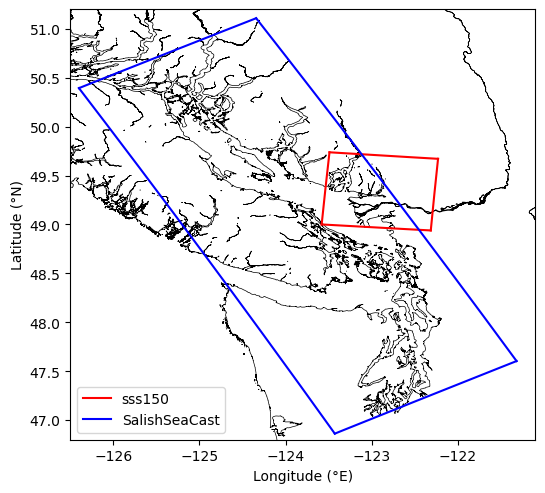

In [11]:
sss150_coords = xr.open_dataset(coords_paths["sss150"])
ssc_coords = xr.open_dataset(coords_paths["ssc"],decode_times=False)

glamf, gphif = sss150_coords.glamf, sss150_coords.gphif

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(coastline[:, 0], coastline[:, 1], color="k", linewidth=0.5)
ax.plot(rivers[:, 0], rivers[:, 1], color="k", linewidth=0.5)

# sss150 domain boundaries
ax.plot(glamf[0, :], gphif[0, :], color="red",label='sss150')  # south
ax.plot(glamf[:, 0], gphif[:, 0], color="red")  # west
ax.plot(glamf[-1, :], gphif[-1, :], color="red")  # north
ax.plot(glamf[:, -1], gphif[:, -1], color="red")  # east

glamf, gphif = mesh_ssc.glamf[0], mesh_ssc.gphif[0]

# SalishSeaCast domain boundaries
ax.plot(glamf[0, :], gphif[0, :], color="blue",label='SalishSeaCast')  # south
ax.plot(glamf[:, 0], gphif[:, 0], color="blue")  # west
ax.plot(glamf[-1, :], gphif[-1, :], color="blue")  # north
ax.plot(glamf[:, -1], gphif[:, -1], color="blue")  # east

ax.set_xlim(-126.5, -121.1)
ax.set_ylim(46.8,51.2)
viz_tools.set_aspect(ax);

ax.set_ylabel('Latitude (°N)')
ax.set_xlabel('Longitude (°E)')
ax.legend();